In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

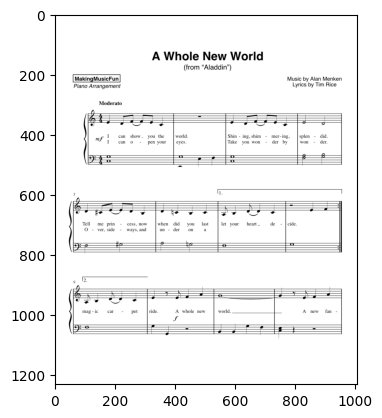

In [2]:
img = cv2.imread('a-whole-new-world-easy-piano-1.png')
plt.imshow(img)

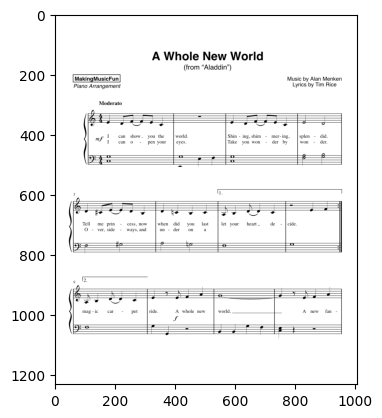

In [3]:
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg, 'gray')

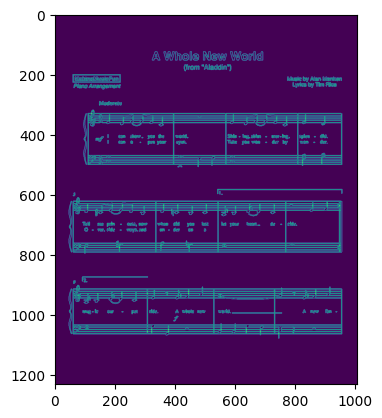

In [4]:
canny = cv2.Canny(grayimg, 50, 100)
plt.imshow(canny)

In [5]:
def draw_lines(img, lines, color = [255, 0, 0], thickness = 1):
    """Utility for drawing lines."""
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

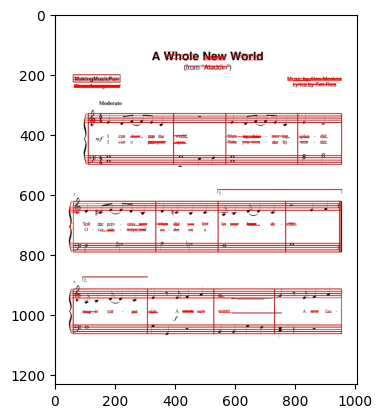

In [6]:
lines = cv2.HoughLinesP(canny, 1, np.pi/2, threshold = 50, minLineLength = 10, maxLineGap = 10)
sample = np.copy(img)
draw_lines(sample, lines)
plt.imshow(sample)

In [7]:
five_lines = []
barlines = []

for line in lines:
    for x1, y1, x2, y2 in line:
        if abs(x1 - x2) <= 1e-3:
            barlines.append(line)

sample2 = np.copy(img)

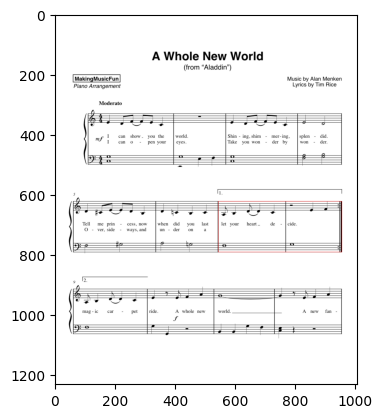

In [8]:
first_line = barlines[0][0]
for line in barlines[1:]:
    x1, y1, x2, y2 = line[0]
    if abs(x1 - first_line[0]) < 10:
        continue
    elif abs(y1 - first_line[1]) > 150:
        continue
    cv2.rectangle(sample2, (x1, y1), (first_line[2], first_line[3]), (255, 0, 0), thickness=1)
    first_line = line[0]
    break
plt.imshow(sample2)